#**Thông tin sinh viên**
* MSSV: 19521388
* Họ và tên: Hoàng Tiến Dũng
* Lớp môn học: CS331.M11 - Thị giác máy tính nâng cao
* Bài tập 4: Cài đặt Linear Regression, Logistic Regression, Softmax Regression và Neural Network bằng Tensorflow

#**Bài làm**

In [12]:
from sklearn.datasets import make_blobs, make_circles
import matplotlib.pyplot as plt
from pandas import DataFrame
import tensorflow as tf
import numpy as np
from tensorflow import keras

#**I. Linear Regression TF**

In [ ]:
X = np.random.randn(100)
e = np.random.randn(100) * 2
y = X * 4 + e

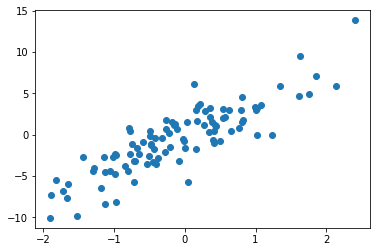

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X, y)
plt.show()

In [ ]:
class LinearRegression():
  def __init__(self):
    pass

  def cost_function(self, X, y, theta):
    y_pred = tf.matmul(tf.transpose(theta), X)
    return 1/2 * tf.reduce_mean(tf.square(y_pred-y))

  def gradient_descent(self, X, y, theta, iters , alpha):
    m = self.X.shape[1]
    costs = []
    for iter in range(iters):
      with tf.GradientTape() as t:
        t.watch(theta)
        cost_f = self.cost_function(X, y, theta)
        dtheta = t.gradient(cost_f,theta)
        theta -= alpha * dtheta
        costs.append(cost_f)
    costs.append(self.cost_function(X, y, theta))
    return theta, costs

  def fit(self, X, y, iters=15, learning_rate=0.01):
    m = X.shape[1]
    n = X.shape[0]
    self.X = X
    self.y = y
    self.iters = iters
    self.X_train = tf.convert_to_tensor(X, dtype='float32') # n x m
    self.X_train = tf.concat([tf.ones([1, m]), self.X_train], 0) # (n+1) x m
    self.y_train = tf.convert_to_tensor(y, dtype='float32') 
    self.y_train = tf.reshape(self.y_train, [1, m]) # 1 x m
    self.theta = tf.zeros([n + 1, 1]) # theta = n+1 x 1
    self.theta, self.costs = self.gradient_descent(self.X_train, self.y_train, self.theta, iters=iters, alpha = learning_rate)

    return self.theta, self.costs
  
  def visual_cost(self):
    fig, ax = plt.subplots()
    ax.plot(range(self.iters + 1), self.costs)
    ax.set(title='Costs', xlabel= 'iters', ylabel='cost')
    plt.show()
  
  def visual_class(self):
    fig, ax = plt.subplots()
    ax.scatter(self.X, self.y)
    x = np.linspace(np.min(self.X), np.max(self.X), 1000)
    ax.plot(x, self.theta[1] * x + theta[0], c='red')
    plt.show()

In [ ]:
lr = LinearRegression()

In [ ]:
X_t = X.reshape([1, -1])

In [ ]:
y_t = y.reshape([1, -1])

In [ ]:
theta, costs = lr.fit(X_t, y_t, 1000, 0.1)

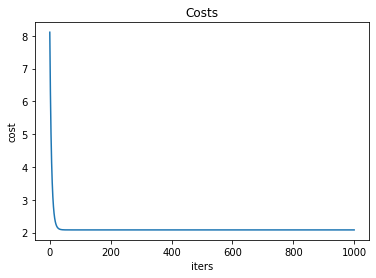

In [ ]:
lr.visual_cost()

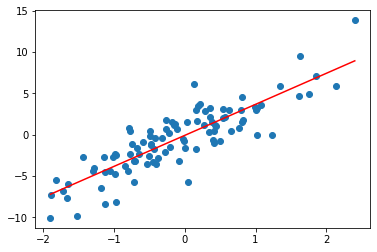

In [ ]:
lr.visual_class()

#**II. Logistic Regression TF**

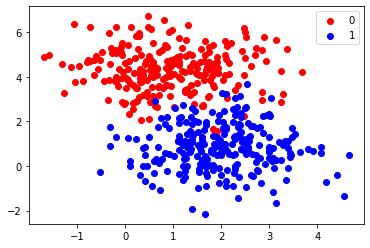

In [ ]:
# Generate data
X, y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=0)
zero0 = np.where(y==0)[0]
one1 = np.where(y==1)[0]
# print(zero0)
# print(one1)
fig, ax = plt.subplots()
ax.scatter(X[zero0, 0], X[zero0, 1], c='red', label="0")
ax.scatter(X[one1, 0], X[one1, 1], c='blue', label="1")
ax.legend()
plt.show()

In [ ]:
X = X.T
y = y.reshape([1, -1])

In [ ]:
X.shape

(2, 500)

In [ ]:
y.shape

(1, 500)

In [ ]:
class LogisticRegression():
  def __init__(self):
    pass

  def sigmoid(self, z):
    return 1.0/(1.0 + tf.math.exp(-z))

  def cost_function(self, X, y, theta):
    m = X.shape[1]
    y_pred = self.sigmoid(tf.matmul(tf.transpose(theta), X))
    cost = -1.0* tf.reduce_mean((y*tf.math.log(y_pred) + (1-y)*tf.math.log(1-y_pred)))
    return cost

  def gradient_descent(self, X, y, theta, iters , alpha ):
    m = X.shape[1]
    costs = []
    for i in range(iters):
      with tf.GradientTape() as tape:
        tape.watch(theta)
        cost = self.cost_function(X=X, y=y, theta=theta)
        dtheta = tape.gradient(cost, theta)
        theta -= alpha * dtheta
        costs.append(cost)
    costs.append(self.cost_function(X=X, y=y, theta=theta))
    return theta, costs

  def fit(self, X, y, iters=15, learning_rate=0.01):
    m = X.shape[1]
    n = X.shape[0]
    self.X = X
    self.y = y
    self.iters = iters
    self.X_train = tf.convert_to_tensor(X, dtype='float32') # n x m
    self.X_train = tf.concat([tf.ones([1, m]), self.X_train], 0) # (n+1) x m
    self.y_train = tf.convert_to_tensor(y, dtype='float32') # 1 x m
    self.theta = tf.zeros([n + 1, 1]) # theta = n+1 x 1
    self.theta, self.costs = self.gradient_descent(self.X_train, self.y_train, self.theta, iters=iters, alpha = learning_rate)

    return self.theta, self.costs
  
  def visual_cost(self):
    fig, ax = plt.subplots()
    ax.plot(range(self.iters + 1), self.costs)
    ax.set(title='Costs', xlabel= 'iters', ylabel='cost')
    plt.show()
  
  def visual_class(self):
    zero0 = np.where(self.y.T==0)[0]
    one1 = np.where(self.y.T==1)[0]
    fig, ax = plt.subplots()
    ax.scatter(self.X.T[zero0, 0], self.X.T[zero0, 1], c='red', label="0")
    ax.scatter(self.X.T[one1, 0], self.X.T[one1, 1], c='blue', label="1")
    ax.legend()

    x = np.linspace(np.min(self.X.T[:, 0]), np.max(self.X.T[:, 0]), 1000)
    ax.plot(x, -(theta[1] * x + theta[0]) / theta[2])
    plt.show()

In [ ]:
lg_model = LogisticRegression()

In [ ]:
theta, costs = lg_model.fit(X, y, 1000, 0.01)

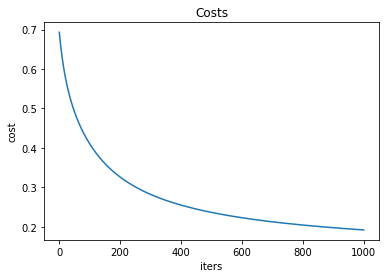

In [ ]:
lg_model.visual_cost()

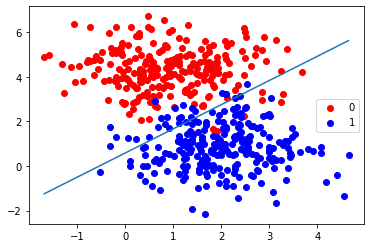

In [ ]:
lg_model.visual_class()

In [ ]:
theta

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[ 0.63407946],
       [ 1.186493  ],
       [-1.09369   ]], dtype=float32)>

#**III. Softmax TF**

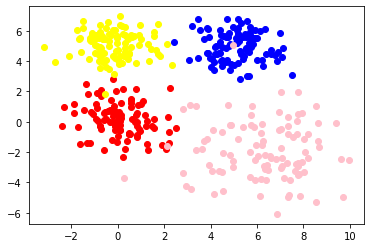

In [ ]:
# Generate data
xlabel0 = np.random.normal(0, 1, (2,100))
xlabel1 = np.random.normal(5, 1, (2, 100))
xlabel2 = np.random.normal(0, 1, (2, 100)) + np.array([[0], [5]])
xlabel3 = np.random.normal(6, 2, (2, 100)) + np.array([[0], [-8]])

ylabel0 = np.zeros((1, 100), np.int8)
ylabel1 = np.ones((1, 100),np.int8)
ylabel2 = np.ones((1, 100), np.int8) * 2
ylabel3 = np.ones((1,100), np.int8) * 3

fig, ax = plt.subplots()
ax.scatter(xlabel0[0], xlabel0[1], color='red')
ax.scatter(xlabel1[0], xlabel1[1], color='blue')
ax.scatter(xlabel2[0], xlabel2[1], color='yellow')
ax.scatter(xlabel3[0], xlabel3[1], color='pink')
plt.show()

In [ ]:
X = np.concatenate((xlabel0, xlabel1, xlabel2, xlabel3), axis=1)
X.shape

(2, 400)

In [ ]:
ylabel = np.concatenate((ylabel0, ylabel1, ylabel2, ylabel3), axis=1)
ylabel.shape

(1, 400)

In [ ]:
#one hot
y = np.eye(4)[ylabel[0,:]]
y = y.T

In [ ]:
class Softmax():
  def __init__(self):
    pass

  def softmax(self, z):
    s = tf.reduce_sum(tf.math.exp(z), axis=0)
    return tf.math.exp(z)/s

  def cost_function(self, X, y, theta):
    m = len(y)
    y_pred = self.softmax(tf.matmul(tf.transpose(theta), X))
    cost = -1.0 * tf.reduce_mean(tf.reduce_sum((y*tf.math.log(y_pred)), axis=0, keepdims=True))
    return cost

  # def gradient_descent(self, X, y, theta, iters , alpha ):
  #   m = len(y)
  #   costs = []
  #   for i in range(iters):
  #     with tf.GradientTape() as tape:
  #       tape.watch(theta)     
  #       cost = self.cost_function(X=X, y=y, theta=theta)
  #       dtheta = tape.gradient(cost, theta)
  #       theta -= alpha * dtheta
  #       costs.append(cost)
  #   costs.append(self.cost_function(X=X, y=y, theta=theta))
  #   return theta, costs

  def gradient_descent(self, X, y, theta, iters , alpha ):
    optimizer = keras.optimizers.SGD(learning_rate=alpha)
    m = len(y)
    costs = []
    for i in range(iters):
      with tf.GradientTape() as tape:
        tape.watch(theta)     
        cost = self.cost_function(X=X, y=y, theta=theta)
        dtheta = tape.gradient(cost, theta)
        optimizer.apply_gradients(zip([dtheta], [theta]))
        costs.append(cost)
      # print(theta)
    costs.append(self.cost_function(X=X, y=y, theta=theta))
    return theta, costs

  def fit(self, X, y, iters=15, learning_rate=0.01):
    m = 400
    n = 2
    self.X = X
    self.y = y
    self.iters = iters
    self.X_train = tf.convert_to_tensor(X, dtype='float32') # n x m
    self.X_train = tf.concat([tf.ones([1, m]), self.X_train], 0) # (n+1) x m
    self.y_train = tf.convert_to_tensor(y, dtype='float32') 
    self.y_train = tf.reshape(self.y_train, [4, m]) # 4 x m
    self.theta = tf.Variable(tf.zeros([n + 1, 4])) # theta = n+1 x 4
    self.theta, self.costs = self.gradient_descent(self.X_train, self.y_train, self.theta, iters=iters, alpha = learning_rate)

    return self.theta, self.costs
  
  def visual_cost(self):
    fig, ax = plt.subplots()
    ax.plot(range(self.iters + 1), self.costs)
    ax.set(title='Costs', xlabel= 'iters', ylabel='cost')
    plt.show()
  
  def visual_class(self):
    self.X_v = self.X.T
    self.y_v = self.y.T
    self.y_v = np.argmax(self.y_v, axis=1)
    zero0 = np.where(self.y_v==0)[0]
    one1 = np.where(self.y_v==1)[0]
    two2 = np.where(self.y_v==2)[0]
    three3 = np.where(self.y_v==3)[0]
    fig, ax = plt.subplots()
    ax.scatter(self.X_v[zero0, 0], self.X_v[zero0, 1], c='red', label="0")
    ax.scatter(self.X_v[one1, 0], self.X_v[one1, 1], c='blue', label="1")
    ax.scatter(self.X_v[two2, 0], self.X_v[two2, 1], c='yellow', label="2")
    ax.scatter(self.X_v[three3, 0], self.X_v[three3, 1], c='pink', label="3")
    ax.legend()

    tt = self.theta.numpy().T
    lst_lins = []
    lst_lins.append(np.linspace(np.min(self.X_v[zero0, 0]), np.max(self.X_v[zero0, 0]), 1000))
    lst_lins.append(np.linspace(np.min(self.X_v[one1, 0]), np.max(self.X_v[one1, 0]), 1000))
    lst_lins.append(np.linspace(np.min(self.X_v[two2, 0]), np.max(self.X_v[two2, 0]), 1000))
    lst_lins.append(np.linspace(np.min(self.X_v[three3, 0]), np.max(self.X_v[three3, 0]), 1000))
    v = 0
    for line in tt:
      # print(line)
      x = lst_lins[v]
      v += 1
      # print(x)
      ax.plot(x, -(line[1] * x + line[0]) / line[2])
    plt.show()

In [ ]:
print(y.T.shape)

(400, 4)


In [ ]:
sm_model = Softmax()

In [ ]:
theta, costs = sm_model.fit(X, y, 50,0.01)

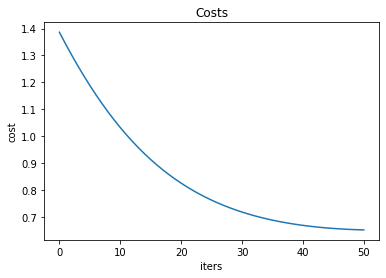

In [ ]:
sm_model.visual_cost()

In [ ]:
theta

<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[ 0.1249999 ,  0.1249999 ,  0.1249999 ,  0.1249999 ],
       [ 0.01102853,  0.6358314 , -0.0229449 ,  0.78076714],
       [ 0.01828302,  0.6216644 ,  0.63179725, -0.23554932]],
      dtype=float32)>

#**IV. Neural Network TF**

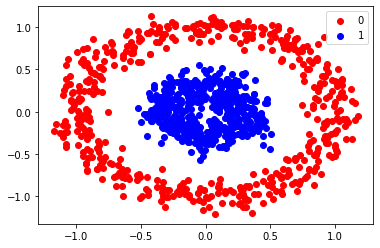

In [ ]:
# Generate data
X, y = make_circles(n_samples = 1000, noise = 0.1, factor = 0.3)
zero0 = np.where(y==0)[0]
one1 = np.where(y==1)[0]
fig, ax = plt.subplots()
ax.scatter(X[zero0, 0], X[zero0, 1], c='red', label="0")
ax.scatter(X[one1, 0], X[one1, 1], c='blue', label="1")
ax.legend()
plt.show()

In [ ]:
# Tạo model
from tensorflow.keras import layers, Sequential, Input
from tensorflow import keras

model = Sequential()
# model.add(Input(shape=(input_shape)))
model.add(layers.Dense(5, activation='softmax', input_shape=(2,)))
model.add(layers.Dense(1, activation='sigmoid'))

iters = 50
lr = 0.1
model.compile(optimizer = keras.optimizers.SGD(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Training
history = model.fit(X, y, epochs=iters)

Epoch 1/50
32/32 [==============================] - 1s 5ms/step - loss: 0.6914 - accuracy: 0.5390
Epoch 2/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.5690
Epoch 3/50
32/32 [==============================] - 0s 4ms/step - loss: 0.6908 - accuracy: 0.5790
Epoch 4/50
32/32 [==============================] - 0s 4ms/step - loss: 0.6905 - accuracy: 0.5760
Epoch 5/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5970
Epoch 6/50
32/32 [==============================] - 0s 4ms/step - loss: 0.6898 - accuracy: 0.5560
Epoch 7/50
32/32 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.5260
Epoch 8/50
32/32 [==============================] - 0s 4ms/step - loss: 0.6889 - accuracy: 0.4620
Epoch 9/50
32/32 [==============================] - 0s 4ms/step - loss: 0.6885 - accuracy: 0.6200
Epoch 10/50
32/32 [==============================] - 0s 4ms/step - loss: 0.6884 - accuracy: 0.6020
Epoch 11/50
32/32 [

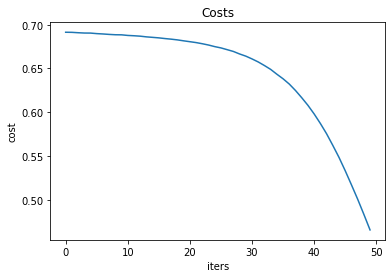

In [ ]:
# Loss
lst_lost = history.history['loss']
fig, ax = plt.subplots()
ax.plot(range(len(lst_lost)), lst_lost)
ax.set(title='Costs', xlabel= 'iters', ylabel='cost')
plt.show()

In [ ]:
# Predict X
y_pred = model.predict(X)
y_pred = np.where(y_pred < 0.5, 0, 1)
y_pred = np.squeeze(y_pred.reshape([1, 1000]))

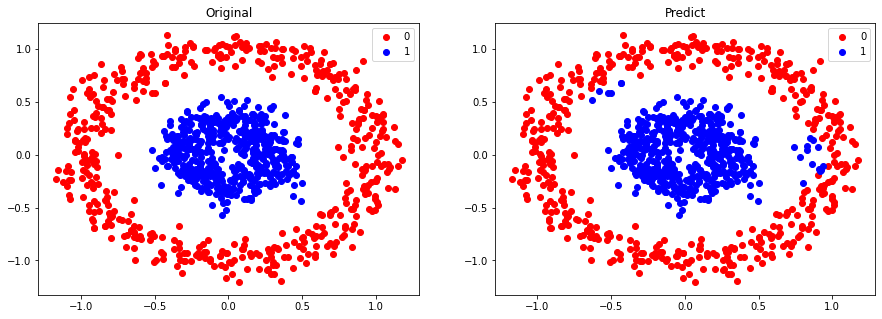

In [ ]:
# X, y = make_circles(n_samples = 1000, noise = 0.1, factor = 0.3)
zero0 = np.where(y==0)[0]
one1 = np.where(y==1)[0]
zero0_pred = np.where(y_pred==0)[0]
one1_pred = np.where(y_pred==1)[0]
fig, [ax1, ax2] = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))
ax1.scatter(X[zero0, 0], X[zero0, 1], c='red', label="0")
ax1.scatter(X[one1, 0], X[one1, 1], c='blue', label="1")
ax1.set(title="Original")
ax1.legend()
ax2.scatter(X[zero0_pred, 0], X[zero0_pred, 1], c='red', label="0")
ax2.scatter(X[one1_pred, 0], X[one1_pred, 1], c='blue', label="1")
ax2.set(title="Predict")
ax2.legend()
plt.show()